In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import RegularGridInterpolator

In [2]:
# Setup

def projectpoints(K,R,t,Q):
    extrin = np.hstack([R,t])
    P = K@extrin
    Q_h = np.vstack([Q,np.ones([1,Q.shape[1]])])
    q_h = P@Q_h
    q = q_h[:-1]/q_h[-1]
    return q

def box3d(n):
    row1 = np.vstack([np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),-0.5*np.ones([1,n]),-0.5*np.ones([1,n])])
    row2 = np.vstack([np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),-0.5*np.ones([1,n]),0.5*np.ones([1,n])])
    row3 = np.vstack([np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),0.5*np.ones([1,n]),-0.5*np.ones([1,n])])
    row4 = np.vstack([np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),0.5*np.ones([1,n]),0.5*np.ones([1,n])])
    row5 = np.vstack([np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),-0*np.ones([1,n]),-0*np.ones([1,n])])
    row6 = np.vstack([-0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),-0.5*np.ones([1,n])])
    row7 = np.vstack([0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),-0.5*np.ones([1,n])])
    row8 = np.vstack([-0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),0.5*np.ones([1,n])])
    row9 = np.vstack([0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),0.5*np.ones([1,n])])
    row10 = np.vstack([-0*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n)),-0*np.ones([1,n])])
    row11 = np.vstack([-0.5*np.ones([1,n]),-0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n))])
    row12 = np.vstack([0.5*np.ones([1,n]),-0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n))])
    row13 = np.vstack([-0.5*np.ones([1,n]),0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n))])
    row14 = np.vstack([0.5*np.ones([1,n]),0.5*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n))])
    row15 = np.vstack([-0*np.ones([1,n]),-0*np.ones([1,n]),np.reshape(np.linspace(-0.5,0.5,n,endpoint=True),(1,n))])
    box = np.hstack([row1,row2,row3,row4,row5,row6,row7,row8,row9,row10,row11,row12,row13,row14,row15])
    return box



[[600.    0.  400.  600. ]
 [  0.  600.  400.  720. ]
 [  0.    0.    1.    1.5]]
[[100.]
 [220.]]


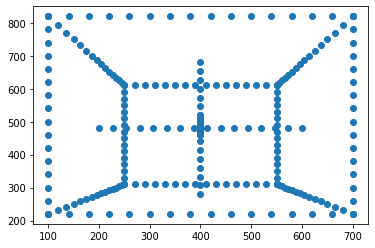

In [3]:
# Exercise 2.1

Q_box = box3d(16)
f = 600
alpha = 1
beta = 0
delta_x = 400
delta_y = 400

# Resolution is 800x800 since it is 2*delta for each direction

R = np.identity(3)
t = np.array([[0,0.2,1.5]]).T
K = np.array([[f,beta*f,delta_x],
             [0,alpha*f,delta_y],
             [0,0,1]])
extrin = np.hstack([R,t])
P = K@extrin
print(P)
P1 = np.array([[-0.5,-0.5,-0.5]]).T
#P1 = np.array([[-0,-0,-0]]).T
q_box = projectpoints(K,R,t,Q_box)
p1 = projectpoints(K,R,t,P1)
print(p1)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(q_box[0,:],q_box[1,:])
#ax.set_xlim([0,800])
#ax.set_ylim([0,800])
plt.show()


In [4]:
# Exercise 2.2

def radial_dist(p,distCoeffs):
    radius = np.sqrt(np.square(p[0,:]) + np.square(p[1,:])) 
    distort = 0
    for i, coeff in enumerate(distCoeffs,1):
        distort += coeff * np.power(radius,i*2)
    return p * (1 + distort)


def projectpoints_dist(K,R,t,Q,distCoeffs):
    extrin = np.hstack([R,t])
    Q_h = np.vstack([Q,np.ones([1,Q.shape[1]])])
    p_h = extrin@Q_h
    p = p_h[:-1]/p_h[-1]
    p_d = radial_dist(p,distCoeffs)
    p_d_h = np.vstack([p_d,np.ones([1,p_d.shape[1]])])
    q_h = K@p_d_h
    q = q_h[:-1]/q_h[-1]
    return q





[[120.4 ]
 [232.24]]


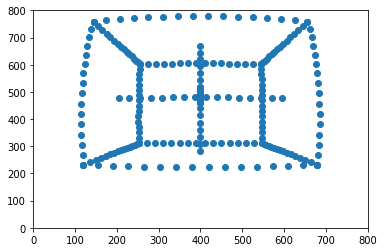

In [5]:
distCoeffs = [-0.2]
q_box = projectpoints_dist(K,R,t,Q_box,distCoeffs)
p1 = projectpoints_dist(K,R,t,P1,distCoeffs)
print(p1)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(q_box[0,:],q_box[1,:])
ax.set_xlim([0,800])
ax.set_ylim([0,800])
plt.show()

(1080, 1920, 3)
[[875   0 540]
 [  0 875 960]
 [  0   0   1]]


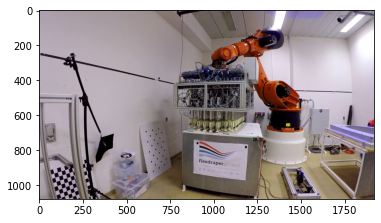

In [24]:
# Exercise 2.3

im = cv2.imread('gopro_robot.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(im)
print(im.shape)

K = np.array([[875,0,540],
             [0,875,960],
             [0,0,1]])
distCoeffs = [-0.245031,0.071524,-0.00994978]


In [28]:
# Exercise 2.4
def undistortImage(im,K,distCoeff):
    (height,width,color) = im.shape
    ratio = height/width
    # Generate meshgrid of all pixels.
    scale = 1.2
    y, x = np.meshgrid(
        np.linspace(-scale, scale, num=width), np.linspace(-scale*ratio, scale*ratio, num=height))
    x=x.flatten()
    y=y.flatten()
    mapping_matrix = np.vstack((x, y)).astype(float) # [x, y]
    
    p = radial_dist(mapping_matrix,distCoeff)
    
    p_h = np.vstack([p,np.ones([1,p.shape[1]])])
    q_h = K@p_h
    target_matrix = q_h[:-1]/q_h[-1]
    fig = plt.figure()
    canvas_matrix = np.zeros(shape=(int(height), int(width),color), dtype=int)
    for i in range(height):
        for j in range(width):
            row = int(target_matrix[0][i*width + j])
            col = int(target_matrix[1][i*width + j])
            
            intensity = im[row][col]
            canvas_matrix[i][j] = intensity
            
            
    return canvas_matrix



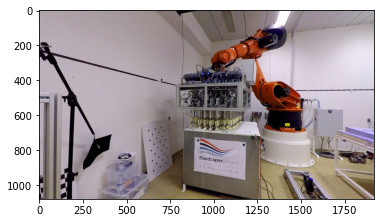

In [29]:
un_dist = undistortImage(im,K,distCoeffs)
plt.imshow(un_dist)


In [30]:
# Exercise 2.6
def CrossOp(p):
    return np.array([[0,-p[2],p[1]],
                    [p[2],0,-p[0]],
                    [-p[1],p[0],0]])

def normalize2d(Q):
    mean = np.mean(Q,axis=1)
    std = np.std(Q,axis=1)
    T = np.array([[1/std[0],0,-mean[0]/std[0]],
                  [0,1/std[1],-mean[1]/std[1]],
                 [0,0,1]])
    return [T@Q, T]

def get_b(q1,q2):
    B = np.kron(q2[:,0], CrossOp(q1[:,0]))
    for i in range(1,len(q1.T)):
        B_temp = np.kron(q2[:,i], CrossOp(q1[:,i]))
        B = np.vstack((B,B_temp))
    return B

def hest(q1,q2):
    """
    Estimates H given points Q1, Q2 on the two image planes. q1 = H q2, q1 and q2 should be homogeneous
    Need at least 4 pairs of points to estimate the matrix with 8 degrees of freedom.
    """
    q1,T1 = normalize2d(q1)
    q2,T2 = normalize2d(q2)
    assert len(q1[0])>1, "We need at least two points (aka two columns)"
    assert len(q1[0])==len(q2[0]), "Number of column of q1 and q2 must be equal!"
    B = get_b(q1,q2) #np.vstack((B0,B1))
    _,_,VT = np.linalg.svd(B.T@B) #U,S,VT = np.linalg.svd(np.hstack((B.T,B)))
    H = np.reshape(VT[-1],(3,3)) # VT is sorted in descending order of singular value
    return np.linalg.inv(T1)@H.T@T2
    


In [35]:
H = np.array([[-2,0,1],[1,-2,0],[0,0,3]])
p = np.array([[1,1],[0,3],[2,3],[2,4]]).T
p_h = np.vstack([p,np.ones((1,p.shape[1]))])
q_h = H@p_h
q = q_h[:-1] / q_h[-1]
print(q)

H_est = hest(q_h,p_h)
print(H_est*(H[0,0]/H_est[0,0]))

[[-0.33333333  0.33333333 -1.         -1.        ]
 [-0.33333333 -2.         -1.33333333 -2.        ]]
[[-2.00000000e+00  1.92987388e-15  1.00000000e+00]
 [ 1.00000000e+00 -2.00000000e+00 -3.19421673e-14]
 [-3.04507214e-14  1.56708608e-14  3.00000000e+00]]


In [46]:
# Exercise 2.9

H = np.random.rand(3,3)
x = np.random.randint(-50,50,100)
y = np.random.randint(-50,50,100)

q2 = np.vstack([x,y,np.ones((1,100))])
q1 = H@q2

H_est = hest(q1,q2)
print("Actual H \n", H)
print("Estimated H \n",H_est*(H[0,0]/H_est[0,0]))

Actual H 
 [[0.8618718  0.07381347 0.47117615]
 [0.20453071 0.13022613 0.9594046 ]
 [0.99012368 0.83608059 0.08410399]]
Estimated H 
 [[0.8618718  0.07381347 0.47117615]
 [0.20453071 0.13022613 0.9594046 ]
 [0.99012368 0.83608059 0.08410399]]
